In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import datetime
import seaborn as sns

In [14]:
api_key = "378637af2f4a4f5b8ad64142250607"
city= "Karachi"

url=f"http://api.weatherapi.com/v1/current.json?key={api_key}&q={city}"

response=requests.get(url)
data=response.json()

if response.status_code == 200:
    temp=data['current']['temp_c']
    humidity=data['current']['humidity']
    condition=data['current']['condition']['text']
    
    print(f"Weather in {city}")
    print(f"Temperature: {temp}°C")
    print(f"Humidity: {humidity}%")
    print(f"Condition: {condition}")
else:
    print("Error:", data)


Weather in Karachi
Temperature: 32.2°C
Humidity: 63%
Condition: Mist


In [23]:
api_key="378637af2f4a4f5b8ad64142250607"

cities=cities = [
    "Karachi", "Lahore", "Islamabad", "Rawalpindi", "Faisalabad",
    "Hyderabad", "Multan", "Peshawar", "Quetta", "Sialkot",
    "Bahawalpur", "Sargodha", "Gujranwala", "Abbottabad", "Mirpur"
]

today_weather=[]
yesterday_weather=[]

for city in cities:
    url = f"http://api.weatherapi.com/v1/current.json?key={api_key}&q={city}"
    res = requests.get(url)
    data = res.json()
    
    if res.status_code == 200:
        today_weather.append({
            "City": city,
            "Date": datetime.date.today(),
            "Temp (°C)": data['current']['temp_c'],
            "Humidity (%)": data['current']['humidity'],
            "Condition": data['current']['condition']['text']
        })
    else:
        print(f"Error fetching today's data for {city}")

# Get yesterday's weather
yesterday_date = (datetime.datetime.now() - datetime.timedelta(days=1)).strftime("%Y-%m-%d")

for city in cities:
    url = f"http://api.weatherapi.com/v1/history.json?key={api_key}&q={city}&dt={yesterday_date}"
    res = requests.get(url)
    data = res.json()
    
    try:
        y = data['forecast']['forecastday'][0]['day']
        yesterday_weather.append({
            "City": city,
            "Date": yesterday_date,
            "Temp (°C)": y['avgtemp_c'],
            "Humidity (%)": y['avghumidity'],
            "Condition": y['condition']['text']
        })
    except:
        print(f"Error fetching yesterday's data for {city}")

# Combine both
combined = pd.DataFrame(today_weather + yesterday_weather)
combined.sort_values(by=["City", "Date"], inplace=True)
combined.reset_index(drop=True, inplace=True)

combined


,City,Date,Temp (°C),Humidity (%),Condition
0,Abbottabad,2025-07-06,32.3,63,Mist
1,Abbottabad,2025-07-05,29.7,75,Light rain shower
2,Bahawalpur,2025-07-06,41.8,32,Sunny
3,Bahawalpur,2025-07-05,38.7,38,Cloudy
4,Faisalabad,2025-07-06,40.8,33,Partly Cloudy
5,Faisalabad,2025-07-05,39.0,37,Thundery outbreaks possible
6,Gujranwala,2025-07-06,34.6,57,Partly Cloudy
7,Gujranwala,2025-07-05,36.8,46,Thundery outbreaks possible
8,Hyderabad,2025-07-06,30.1,59,Mist
9,Hyderabad,2025-07-05,26.3,66,Patchy light drizzle


In [24]:
combined.to_csv("pakistan_weather_today_yesterday.csv", index=False)

In [17]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [18]:
temp_df = combined.pivot(index='City', columns='Date', values='Temp (°C)')
temp_df = temp_df.sort_values(by=temp_df.columns[-1], ascending=False)  

temp_df


Date,2025-07-06,2025-07-05
City,,
Multan,37.3,40.1
Sargodha,41.4,39.2
Faisalabad,40.8,39.0
Peshawar,26.3,38.9
Bahawalpur,40.7,38.7
Gujranwala,34.6,36.8
Lahore,27.1,36.2
Sialkot,33.9,35.1
Mirpur,36.4,33.4


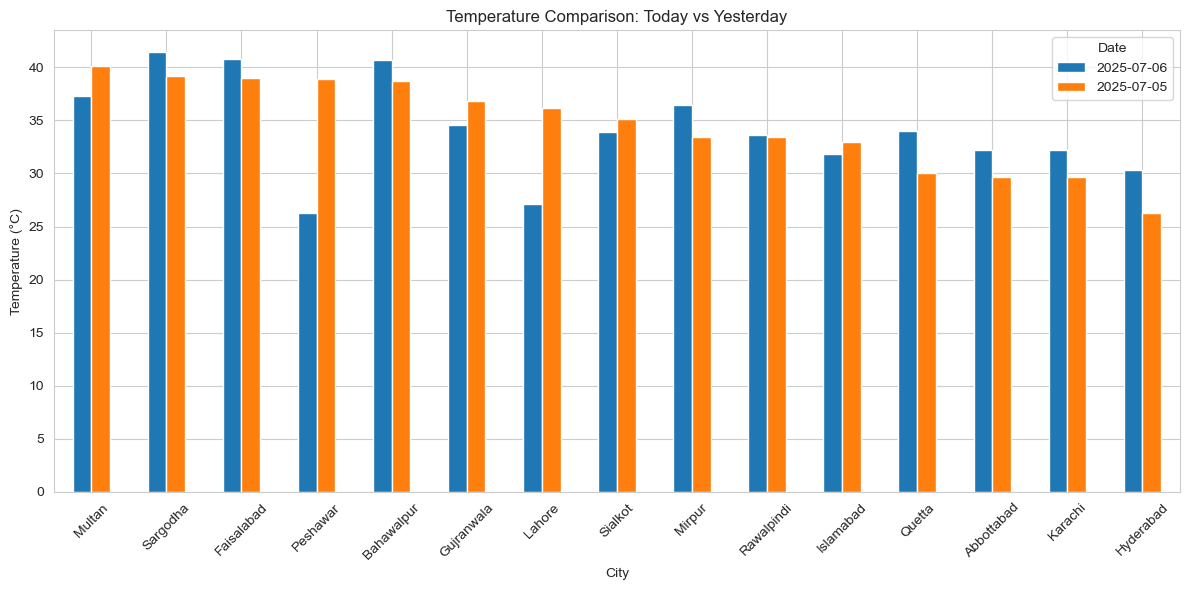

In [19]:
temp_df.plot(kind='bar')
plt.title("Temperature Comparison: Today vs Yesterday")
plt.ylabel("Temperature (°C)")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.legend(title="Date")
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_15860\2910372567.py:10: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


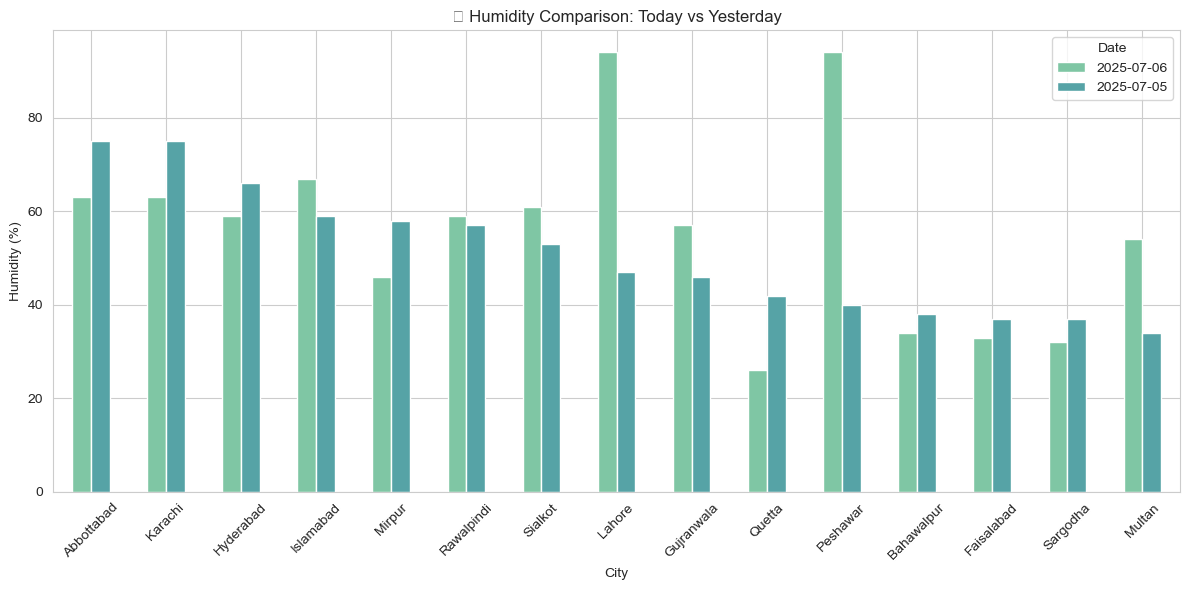

In [20]:
hum_df = combined.pivot(index='City', columns='Date', values='Humidity (%)')
hum_df = hum_df.sort_values(by=hum_df.columns[-1], ascending=False)

hum_df.plot(kind='bar', color=["#7FC6A4", "#56A3A6"])
plt.title("💧 Humidity Comparison: Today vs Yesterday")
plt.ylabel("Humidity (%)")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.legend(title="Date")
plt.tight_layout()
plt.show()